# Model based approach

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder

## 1) import the data

In [7]:
games = pd.read_csv("/Users/magalirousseau/code/Agnes-Lain/game_one/raw_data/rawg_games.csv").copy()

In [8]:
games.head()

,Unnamed: 0,game_id,slug,name,description,released,rating,detail_ratings,ratings_count,suggestions_count,game_series_count,reviews_count,metacritic,game_platforms,game_genres,game_tags,developers,publishers
0,0,446900,high-rise-a-puzzle-cityscape,High Rise - A Puzzle Cityscape,High Rise is a innovative take on the match 3 ...,2020-05-16,0.0,4|recommended|1|100.0,1,27,0,1,NaN,3|iOS,"Casual, Puzzle","Space, city, friends, fun, match, cubes",181849|Florian Grolig,42334|Florian Grolig
1,1,446900,high-rise-a-puzzle-cityscape,High Rise - A Puzzle Cityscape,High Rise is a innovative take on the match 3 ...,2020-05-16,0.0,4|recommended|1|100.0,1,27,0,1,NaN,3|iOS,"Casual, Puzzle","Space, city, friends, fun, match, cubes",181849|Florian Grolig,42334|Florian Grolig
2,2,264830,twinfold,Twinfold,<p>Twinfold delves into the duplicity of dupli...,2018-12-05,0.0,5|exceptional|2|100.0,1,101,0,2,NaN,"21|Android, 3|iOS, 4|PC, 5|macOS","Strategy, Indie, Puzzle","Singleplayer, Steam Achievements",2241|Kenny Sun,1904|Kenny Sun
3,3,58443,pocket-run-pool,Pocket-Run Pool,<p>The return of arcade pool from the creator ...,2018-05-24,0.0,4|recommended|1|100.0,1,38,0,1,NaN,3|iOS,Board Games,Singleplayer,179|Zach Gage,112|Zach Gage
4,4,51288,cinco-paus,Cinco Paus,Tens cinco varinhas mágicas mas não sabes o qu...,2017-12-25,0.0,NaN,0,44,0,0,NaN,3|iOS,"Adventure, Strategy",NaN,638|Michael Brough,488|Michael Brough


## 1) Clean the data

In [9]:
games['game_genres'] = games['game_genres'].astype(str)

In [10]:
games['game_tags'] = games['game_tags'].astype(str)

In [11]:
games = games.drop(['Unnamed: 0', 'description', 'released', 'rating', 'detail_ratings', 'ratings_count', 'suggestions_count', 'game_series_count', 'reviews_count', 'metacritic', 'game_platforms', 'developers', 'publishers'], axis=1)

In [12]:
games.head()

,game_id,slug,name,game_genres,game_tags
0,446900,high-rise-a-puzzle-cityscape,High Rise - A Puzzle Cityscape,"Casual, Puzzle","Space, city, friends, fun, match, cubes"
1,446900,high-rise-a-puzzle-cityscape,High Rise - A Puzzle Cityscape,"Casual, Puzzle","Space, city, friends, fun, match, cubes"
2,264830,twinfold,Twinfold,"Strategy, Indie, Puzzle","Singleplayer, Steam Achievements"
3,58443,pocket-run-pool,Pocket-Run Pool,Board Games,Singleplayer
4,51288,cinco-paus,Cinco Paus,"Adventure, Strategy",nan


In [13]:
games['game_genres'] = games['game_genres'].str.split(",")

In [14]:
def strip_list(series):
    series = [el.strip() for el in series]
    return series

In [15]:
games['game_genres'] = games['game_genres'].apply(strip_list)

In [16]:
games['game_tags'] = games['game_tags'].str.split(",")

In [17]:
games['game_tags'] = games['game_tags'].apply(strip_list)

## 3) Encode

In [18]:
def get_all_genre(series):
    genres = []
    for row in series:
        genres.append(row)
    return genres

In [19]:
def get_list_unique_values(series): 
    all_genres = get_all_genre(series)
    flat_genres = [item for sublist in all_genres for item in sublist]
    genres_unique = list(set(flat_genres))
    genres_unique.remove('nan')
    return genres_unique

In [20]:
genres_unique = get_list_unique_values(games['game_genres'])
tags_unique = get_list_unique_values(games['game_tags'])

In [21]:
genres_unique

['Board Games',
 'Adventure',
 'Action',
 'Platformer',
 'Arcade',
 'Card',
 'Shooter',
 'Indie',
 'Simulation',
 'Massively Multiplayer',
 'Fighting',
 'Casual',
 'RPG',
 'Strategy',
 'Educational',
 'Racing',
 'Puzzle',
 'Family',
 'Sports']

In [22]:
def create_genre_col(list, df):
    for el in list:
        df[el] = 0
    return df

In [23]:
games = create_genre_col(genres_unique, games)

In [24]:
games = create_genre_col(tags_unique, games)

In [25]:
games.head()

,game_id,slug,name,game_genres,game_tags,Board Games,Adventure,Action,Platformer,Arcade,...,Cycling,Roguelike,lucasarts,Rock Music,russia,dungeons,immersive-sim,Games Workshop,Steam-prestationer,Surreal
0,446900,high-rise-a-puzzle-cityscape,High Rise - A Puzzle Cityscape,"[Casual, Puzzle]","[Space, city, friends, fun, match, cubes]",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,446900,high-rise-a-puzzle-cityscape,High Rise - A Puzzle Cityscape,"[Casual, Puzzle]","[Space, city, friends, fun, match, cubes]",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,264830,twinfold,Twinfold,"[Strategy, Indie, Puzzle]","[Singleplayer, Steam Achievements]",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,58443,pocket-run-pool,Pocket-Run Pool,[Board Games],[Singleplayer],0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,51288,cinco-paus,Cinco Paus,"[Adventure, Strategy]",[nan],0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
def my_ohe(df, liste, series):
    for row in range(len(df)):
        for el in liste:
            if el in series[row]:
                df[el][row] = 1
    return df

In [27]:
games = my_ohe(games, genres_unique, games['game_genres'])
games = my_ohe(games, tags_unique, games['game_tags'])

<ipython-input-26-d76c70f2a5a8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[el][row] = 1


In [28]:
games.describe()

,game_id,Board Games,Adventure,Action,Platformer,Arcade,Card,Shooter,Indie,Simulation,...,Cycling,Roguelike,lucasarts,Rock Music,russia,dungeons,immersive-sim,Games Workshop,Steam-prestationer,Surreal
count,17695.000000,17695.000000,17695.000000,17695.000000,17695.000000,17695.000000,17695.000000,17695.000000,17695.000000,17695.000000,...,17695.00000,17695.000000,17695.000000,17695.000000,17695.000000,17695.00000,17695.000000,17695.000000,17695.000000,17695.000000
mean,50503.487313,0.007347,0.371574,0.456400,0.023340,0.054931,0.004691,0.054366,0.527381,0.153772,...,0.00017,0.026053,0.000057,0.000113,0.000057,0.00017,0.000057,0.003052,0.000057,0.011585
std,92887.561921,0.085400,0.483239,0.498109,0.150985,0.227852,0.068329,0.226744,0.499264,0.360740,...,0.01302,0.159296,0.007518,0.010631,0.007518,0.01302,0.007518,0.055159,0.007518,0.107012
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,12683.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,19569.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,45833.500000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
max,560792.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


In [29]:
games.head()

,game_id,slug,name,game_genres,game_tags,Board Games,Adventure,Action,Platformer,Arcade,...,Cycling,Roguelike,lucasarts,Rock Music,russia,dungeons,immersive-sim,Games Workshop,Steam-prestationer,Surreal
0,446900,high-rise-a-puzzle-cityscape,High Rise - A Puzzle Cityscape,"[Casual, Puzzle]","[Space, city, friends, fun, match, cubes]",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,446900,high-rise-a-puzzle-cityscape,High Rise - A Puzzle Cityscape,"[Casual, Puzzle]","[Space, city, friends, fun, match, cubes]",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,264830,twinfold,Twinfold,"[Strategy, Indie, Puzzle]","[Singleplayer, Steam Achievements]",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,58443,pocket-run-pool,Pocket-Run Pool,[Board Games],[Singleplayer],1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,51288,cinco-paus,Cinco Paus,"[Adventure, Strategy]",[nan],0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 4) Dimensionality reduction

**Extract encoded columns**

In [30]:
games_encoded = games.drop(columns = ['game_id', 'slug', 'name', 'game_genres', 'game_tags'])

### A) SVD approach

In [31]:
from sklearn.decomposition import TruncatedSVD

# Apply SVD
svd = TruncatedSVD(n_components=120)
latent_df = svd.fit_transform(games_encoded)

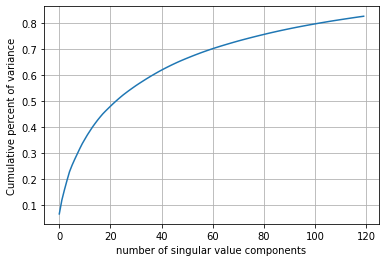

In [32]:
import matplotlib.pyplot as plt
# Plot variance as a function of the number of components.
plt.plot(svd.explained_variance_ratio_.cumsum())
plt.xlabel('number of singular value components')
plt.ylabel('Cumulative percent of variance')   
plt.grid()
plt.show()

In [33]:
# keep the first 125 number of latent components.
n = 125 
latent_df = pd.DataFrame(latent_df[:,0:n], index=games.name.tolist())
latent_df.shape

(17695, 120)

In [34]:
latent_df.head()

,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,119
High Rise - A Puzzle Cityscape,0.232528,-0.332883,-0.269333,0.208558,-0.107756,-0.418399,-0.029421,-0.114421,0.005170,0.523194,...,-0.028360,0.049024,0.125718,0.134200,0.161346,0.096373,0.006327,0.541435,0.142979,0.023247
High Rise - A Puzzle Cityscape,0.232528,-0.332883,-0.269333,0.208558,-0.107756,-0.418399,-0.029421,-0.114421,0.005170,0.523194,...,-0.028360,0.049024,0.125718,0.134200,0.161346,0.096373,0.006327,0.541435,0.142979,0.023247
Twinfold,1.357315,-0.469323,-0.724717,-0.029546,0.099979,0.348044,0.210499,-0.015675,0.260596,-0.491581,...,-0.086228,-0.033448,-0.010410,0.030076,0.014475,-0.080637,-0.009041,-0.026875,-0.017717,-0.044963
Pocket-Run Pool,0.515041,-0.147100,-0.124232,0.270616,0.072821,-0.035987,0.175117,-0.276944,0.148407,0.012570,...,-0.001681,-0.037858,-0.044257,-0.030424,-0.050044,0.038714,0.027092,0.087836,0.037760,0.000637
Cinco Paus,0.353270,-0.215459,0.111535,0.393417,0.411241,0.220528,-0.297960,-0.346116,0.226784,-0.301171,...,-0.019349,0.022834,0.022898,-0.012362,0.028597,-0.044005,0.019994,-0.001837,-0.009193,-0.009022


In [35]:
latent_df.index[3]

'Pocket-Run Pool'

## 6) Apply cosine similarity in content

In [53]:
from sklearn.metrics.pairwise import cosine_similarity

# Get the latent vectors for "Stronghold: Crusader" from content and collaborative matrices
v1 = np.array(latent_df.loc["Mario Kart 8"]).reshape(1, -1)

# Compute the cosine similartity of this movie with the others in the list
sim1 = cosine_similarity(latent_df, v1).reshape(-1)

In [54]:
dictDf = {'content': sim1}
recommendation_df = pd.DataFrame(dictDf, index = latent_df.index)

In [55]:
recommendation_df.sort_values('content', ascending=False, inplace=True)
recommendation_df.head(10)

,content
Mario Kart 8,1.000000
Cracking Sands,0.932660
WipEout 2048,0.890977
Reckless Racing,0.886550
PixelJunk Racers 2nd Lap,0.872976
Star Wars: Racer Revenge,0.809545
Sonic & SEGA Racing,0.805429
Adventure Pop,0.795894
SuperStreetFighter2THD,0.746681
MOBILE SUIT GUNDAM BATTLE OPERATION 2,0.742804


In [47]:
def find_game(game, letter):
    if game.startswith(letter):
        return game
    else:
        return False

In [49]:
letter ="Mario"

for game in latent_df.index:
    if game.startswith(letter):
        print(game)

Mario Tennis Aces
Mario Kart 8 Deluxe
Mario Kart 8
Mario + Rabbids Kingdom Battle
Mario Kart 64 (1996)
Mario Kart 7
Mario Kart DS
Mario + Rabbids Kingdom Battle Donkey Kong Adventure
Mario & Luigi: Dream Team
Mario Kart Wii
Mario Bros. (1983)


In [56]:
games.head()

,game_id,slug,name,game_genres,game_tags,Board Games,Adventure,Action,Platformer,Arcade,...,Cycling,Roguelike,lucasarts,Rock Music,russia,dungeons,immersive-sim,Games Workshop,Steam-prestationer,Surreal
0,446900,high-rise-a-puzzle-cityscape,High Rise - A Puzzle Cityscape,"[Casual, Puzzle]","[Space, city, friends, fun, match, cubes]",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,446900,high-rise-a-puzzle-cityscape,High Rise - A Puzzle Cityscape,"[Casual, Puzzle]","[Space, city, friends, fun, match, cubes]",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,264830,twinfold,Twinfold,"[Strategy, Indie, Puzzle]","[Singleplayer, Steam Achievements]",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,58443,pocket-run-pool,Pocket-Run Pool,[Board Games],[Singleplayer],1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,51288,cinco-paus,Cinco Paus,"[Adventure, Strategy]",[nan],0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
new_df = games[['game_id', 'name']]

In [58]:
new_df.head()

,game_id,name
0,446900,High Rise - A Puzzle Cityscape
1,446900,High Rise - A Puzzle Cityscape
2,264830,Twinfold
3,58443,Pocket-Run Pool
4,51288,Cinco Paus


In [59]:
new_df['name'] = strip_list(new_df['name'])

<ipython-input-59-fa7ffaf928fd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['name'] = strip_list(new_df['name'])


,game_id,name
0,446900,High Rise - A Puzzle Cityscape
1,446900,High Rise - A Puzzle Cityscape
2,264830,Twinfold
3,58443,Pocket-Run Pool
4,51288,Cinco Paus
...,...,...
17690,10350,GOCCO OF WAR
17691,15836,Conquest of Elysium 4
17692,49840,Dominions 5 - Warriors of the Faith
17693,4735,Red Faction: Battlegrounds


In [88]:
import string
import nltk
from nltk.tokenize import word_tokenize

In [89]:
def clean_text(text):
    # remove punctuation
    text =  ''.join([e for e in text if e not in string.punctuation])
    # convert to lower case
    text = text.lower()
    # remove numbers
    text = ''.join(word for word in text if not word.isdigit())
    return text

In [90]:
def clean_column(series):
    series = [clean_text(el) for el in series]
    return series

In [91]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/magalirousseau/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [107]:
new_df['name_endoc'] = new_df['name'].apply(clean_text)

<ipython-input-107-376050a9b67d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['name_endoc'] = new_df['name'].apply(clean_text)


In [108]:
new_df

,game_id,name,name_endoc
0,446900,high rise a puzzle cityscape,high rise a puzzle cityscape
1,446900,high rise a puzzle cityscape,high rise a puzzle cityscape
2,264830,twinfold,twinfold
3,58443,pocketrun pool,pocketrun pool
4,51288,cinco paus,cinco paus
...,...,...,...
17690,10350,gocco of war,gocco of war
17691,15836,conquest of elysium,conquest of elysium
17692,49840,dominions warriors of the faith,dominions warriors of the faith
17693,4735,red faction battlegrounds,red faction battlegrounds


In [109]:
from sklearn.feature_extraction.text import CountVectorizer

In [110]:
corpus = new_df['name_endoc']

In [111]:
vectorizer = CountVectorizer()

In [112]:
X = vectorizer.fit_transform(corpus)

In [114]:
matrix = pd.DataFrame(X.toarray(), index= new_df['name'].tolist())

In [120]:
svd_2 = TruncatedSVD(n_components=200)
latent_df_2 = svd.fit_transform(matrix)

In [123]:
# keep the first 125 number of latent components.
n = 150 
latent_df_2 = pd.DataFrame(latent_df_2[:,0:n], index=games.name.tolist())
latent_df_2.shape

(17695, 120)

In [124]:
latent_df_2.head()

,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,119
High Rise - A Puzzle Cityscape,1.588333e-02,8.677017e-03,-5.161431e-03,-1.030280e-02,2.203952e-03,1.561963e-03,1.323591e-02,-8.050141e-03,1.477668e-02,-1.368012e-03,...,-3.067179e-02,-4.718663e-02,3.050458e-02,-3.410936e-02,1.368892e-02,1.954957e-02,2.129205e-02,1.952495e-03,5.907510e-02,-4.749917e-02
High Rise - A Puzzle Cityscape,1.588333e-02,8.677017e-03,-5.161431e-03,-1.030280e-02,2.203952e-03,1.561963e-03,1.323591e-02,-8.050141e-03,1.477668e-02,-1.368012e-03,...,-3.067179e-02,-4.718663e-02,3.050458e-02,-3.410936e-02,1.368892e-02,1.954957e-02,2.129205e-02,1.952495e-03,5.907510e-02,-4.749917e-02
Twinfold,2.238955e-22,4.885259e-20,-3.419987e-18,-5.033267e-17,-6.029475e-16,1.095117e-15,-7.483147e-16,8.333335e-16,3.295759e-15,4.554701e-15,...,-2.614180e-11,-2.632799e-11,-5.743952e-12,9.881139e-12,2.485065e-13,2.278537e-11,-1.287569e-11,3.908843e-12,-8.569149e-12,-2.385354e-12
Pocket-Run Pool,1.277889e-04,5.376588e-04,-1.022876e-04,6.491415e-05,9.737685e-05,-2.569923e-05,-3.934713e-05,-3.070465e-04,-1.103167e-04,-1.281077e-04,...,1.874912e-03,9.797488e-04,-1.557312e-04,-1.589882e-03,2.318293e-03,-2.787776e-03,-2.224251e-03,4.604460e-04,3.601634e-04,-2.457223e-03
Cinco Paus,9.780457e-22,-2.004389e-19,1.433052e-17,9.526629e-15,6.061442e-14,7.080926e-14,-2.278685e-13,-8.808569e-14,1.695638e-13,-1.061173e-13,...,-3.461983e-10,2.784852e-09,-1.663252e-09,8.922674e-10,1.009434e-09,8.465096e-11,-3.060855e-09,2.937249e-10,9.010273e-10,1.722901e-09


In [127]:
from sklearn.metrics.pairwise import cosine_similarity

# Get the latent vectors for "Stronghold: Crusader" from content and collaborative matrices
v2 = np.array(latent_df_2.loc["Mario Kart 8"]).reshape(1, -1)

# Compute the cosine similartity of this movie with the others in the list
sim2 = cosine_similarity(latent_df_2, v1).reshape(-1)

In [128]:
dictDf = {'content': sim2}
recommendation_df_2 = pd.DataFrame(dictDf, index = latent_df_2.index)

In [129]:
recommendation_df_2.sort_values('content', ascending=False, inplace=True)
recommendation_df_2.head(10)

,content
Mario Kart 8,1.000000
Mario Kart 64 (1996),1.000000
Mario Kart 7,1.000000
Mario Kart Wii,0.999967
Mario Kart DS,0.999965
Mario Tennis Aces,0.990672
Mario Bros. (1983),0.980006
Miitopia (3DS),0.893163
Gamma Bros 1.5,0.830510
TWIN BROS,0.827566
